In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Cuestiones Previas

1) Dado que el redondeo en base 10 de la suma o producto de dos números es $\pm 0.5 \cdot{} \epsilon$, donde  $\epsilon$ es el valor la última cifra significativa y que el dígito eliminado es aleatorio ¿podemos suponer que el redondeo es una variable aleatoria uniforme? 

Dado que $\epsilon$ es una variable aleatoria uniforme ningún número tendrá más probabilidad que otro, luego sí podemos suponer que el redondeo es una v.a. uniforme

2) Si dibujo la gráfica de función de densidad del error por redondeo ¿Como debería ser dicha gráfica?


3) Si asumimos que el error de redondeo es una variable aleatoria uniforme entre $-0.5 \cdot{} \epsilon$ y $0.5 \cdot{} \epsilon$ ¿Cuál debería ser error absoluto promedio de la suma (o el producto) de un número  elevado de números en coma flotante?, da una respuesta razonada.  

# Ejercicio 1

Consideramos la función
$$
f(x) = \frac{4x^4-59x + 324x^2 - 751x + 622}{x^4 - 14x^3 + 72x^2 - 151x +112}.
$$
Vamos a considerar también los valores $x = 1,606 + 2^{-52}i$ con $i = 0,1,\dots,800$ y a dibujar la función en esos puntos. 

¿Sale una figura continua? ¿Por qué? ¿Puedes explicar el patrón que sale? ¿Qué 
consecuencias puedes sacar sobre el redondeo?

1.606


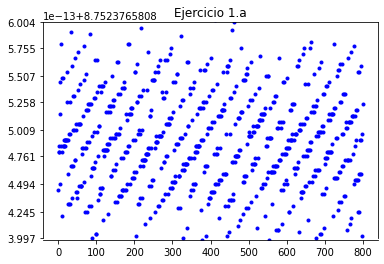

In [7]:
def plot_func(f, i_range, y_lims, i_shift=1.606, title=""):
    values = f(i_shift + 2**(-52) * i_range)

    plt.plot(i_range, values, 'b.')
    plt.ylim(y_lims[0], y_lims[1])
    plt.title(title)
    plt.show()

f1 = lambda x: (4*x**4 - 59*x**3 + 324*x**2-751*x + 622) / \
                (x**4 - 14*x**3 + 72*x**2 - 151*x + 112)
i_range = np.arange(800)
y_lims= [8.7523765807784, 8.7523765807786]
plot_func(f1, i_range, y_lims, title = "Ejercicio 1.a")



Como vemos, la figura obtenida no es una figura continua, sino que los puntos se distribuyen en líneas oblicuas. El gráfico debería ser una función continua pues el denominador [no tiene raíces reales](https://www.wolframalpha.com/input/?i=find+roots+of+%28x**4+-+14*x**3+%2B+72*x**2+-+151*x+%2B+112%29).

### Aplicación de la regla de Horner

Consideramos la función
$$
f(x) = \frac{622+ x \ (-751 + x (324 + x (-59 + 4x)))}{112 + x \cdot (-151 + x (72 + x(-14+x)))}
$$

Esta función es la misma que la anterior, solo que hemos extraído $x$ en común cuando era posible. La definimos y la representamos

1.606


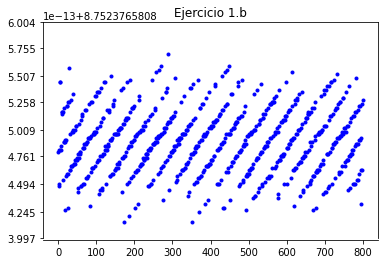

In [8]:
f2 = lambda x: (622 + x * (-751 + x * (324 + x * (-59 + 4 * x))) ) / \
                (112 + x * (-151 + x * (72 + x * (-14 + x))) )
plot_func(f2, i_range, y_lims, title = "Ejercicio 1.b")

Se puede observar que ahora los valores que obtiene la función, aunque siguen separados en líneas oblícuas, se encuentran más concentrados. Es decir, se tiene una varianza menor en estas líneas.

1.606


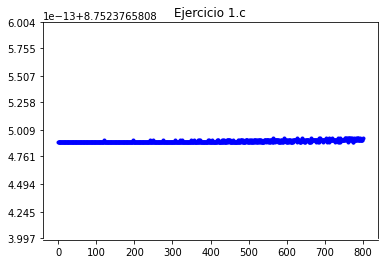

In [9]:
f3 = lambda x: 4 - ( 3 * (x-2) * ((x-5)**2 + 4) ) / \
                ( x + (x-2)**2 * ((x-5)**2 + 3) )
plot_func(f3, i_range, y_lims, title = "Ejercicio 1.c")

2.4


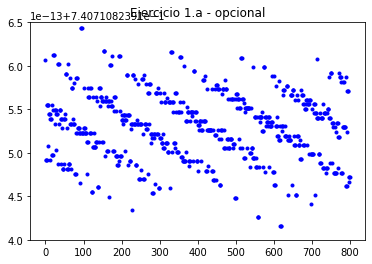

In [11]:
i_shift2 = 2.4
y_lims2 = [.7407108239094, .74071082390965]
plot_func(f1, i_range, y_lims2, i_shift2, "Ejercicio 1.a - opcional")

2.4


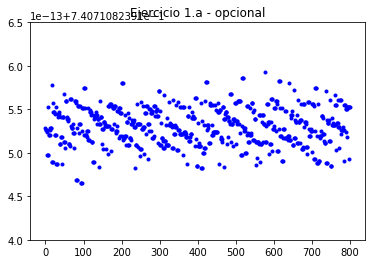

In [14]:

plot_func(f2, i_range, y_lims2, i_shift2, "Ejercicio 1.a - opcional")